In [70]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imageio


In [78]:
%run utils.ipynb

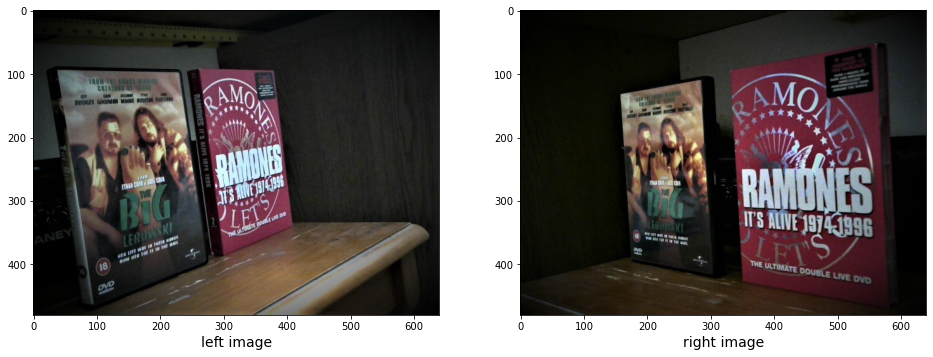

In [83]:
im1 = imageio.imread('image_left.jpg')
im2 = imageio.imread('image_right.jpg')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(im1, cmap="gray")
ax1.set_xlabel("left image", fontsize=14)

ax2.imshow(im2, cmap="gray")
ax2.set_xlabel("right image", fontsize=14)

plt.show()

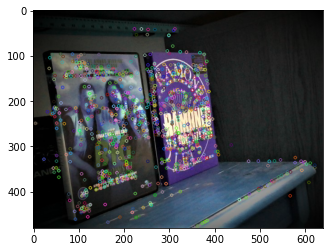

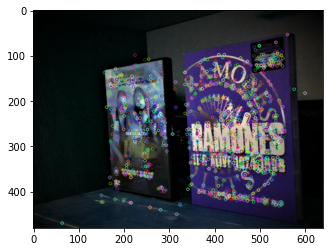

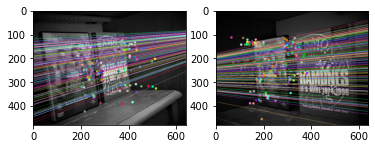

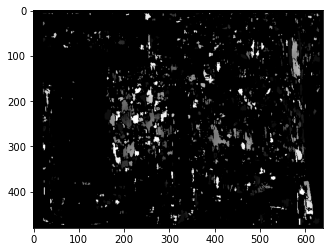

1.7647058823529411 cm
2.912621359223301 cm
4.109589041095891 cm
9.67741935483871 cm
4.3478260869565215 cm


In [84]:


# # 1- Read and resize Images
img1 = cv2.imread('image_left.jpg')
img2 = cv2.imread('image_right.jpg')

# 2- Get Keypoints in both images and draw them
kp1, des1 = get_keypoints(img1)
kp2, des2 = get_keypoints(img2)

# 3- match between both images keypoints
pts1, pts2 = match_keypoints(kp1, kp2, des1, des2, img1, img2)

# 4- Create Fundumental matrix using the matched keypoints -> cv.findFundamentalMat()
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

# 5- Use the fundumental matrix to get the epiline of a point -> cv.computeCorrespondEpilines
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)

lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)

# 6- draw the the epiline corresponding to a point
img5, img6 = draw_epilines(img1, img2, lines1, pts2, pts1)
img3, img4 = draw_epilines(img2, img1, lines2, pts1,pts2)

plt.subplot(121), plt.imshow(img5)
plt.subplot(122), plt.imshow(img3)
plt.show()
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(img1,img2)
plt.imshow(disparity,'gray')
plt.show()
baseline=30
focal=10

# depth=(baseline*focal)/disparity
depth=np.zeros(disparity.shape)
for i in range(480):
        for j in range(640):
            if disparity[i][j]==0:
                depth[i][j] = 0
            else:
                depth[i][j] = baseline * focal / disparity[i][j]

# depth=(baseline*focal)/disparity
depth=abs(depth)
print(depth[137,273],"cm")
print(depth[260,278],"cm")
print(depth[305,570],"cm")
print(depth[342,196],"cm")
print(depth[472,611],"cm")